In [14]:
# imports
import json
import pandas as pd
import seaborn as sns
from glob import glob

from _01_get_api.get_api_save_json import get_data_1, get_data_2, get_data_3
from _02_preprocessing.preprocessing import data_1_json2df, data_2_json2df, data_3_json2df
from _03_data_pipeline.data_pipeline import check_data, get_data

import matplotlib.pyplot as plt
plt.rc('font',family='AppleGothic')
plt.rc('axes',unicode_minus=False)
plt.rc('date.autoformatter',minute="%H:%M")

In [15]:
from _04_data_eda.read_data import read_data

In [16]:
df_1,df_2,df_3 = read_data('2호선','선릉역')

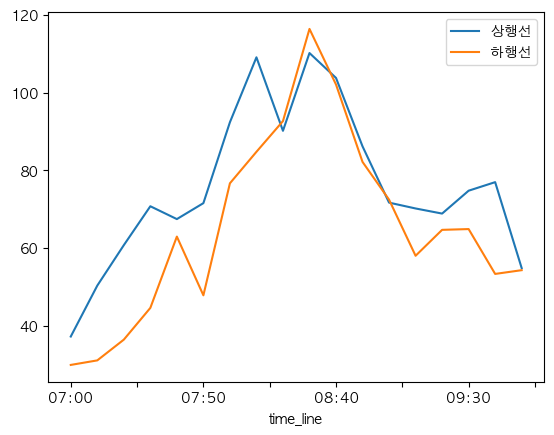

In [17]:
df_1[(df_1['weekday']=='weekday') & \
     (df_1['updn']==0) & \
     (df_1['rapid']==0) & \
     (df_1['hh'].isin([7,8,9]))].groupby('time_line')['congestionTrain'].mean().plot(label='상행선')

df_1[(df_1['weekday']=='weekday') & \
     (df_1['updn']==1) & \
     (df_1['rapid']==0) & \
     (df_1['hh'].isin([7,8,9]))].groupby('time_line')['congestionTrain'].mean().plot(label='하행선')

plt.legend()
plt.show()

In [18]:
df_2_temp_1=df_2[(df_2['weekday']=='weekday') & \
                 (df_2['updn']==0) & \
                 (df_2['rapid']==0) & \
                 (df_2['hh'].isin([7,8,9]))].groupby('time_line')[[i for i in df_2.columns if i.startswith('혼잡도')]].mean()

df_2_temp_2=df_2[(df_2['weekday']=='weekday') & \
                 (df_2['updn']==1) & \
                 (df_2['rapid']==0) & \
                 (df_2['hh'].isin([7,8,9]))].groupby('time_line')[[i for i in df_2.columns if i.startswith('혼잡도')]].mean()

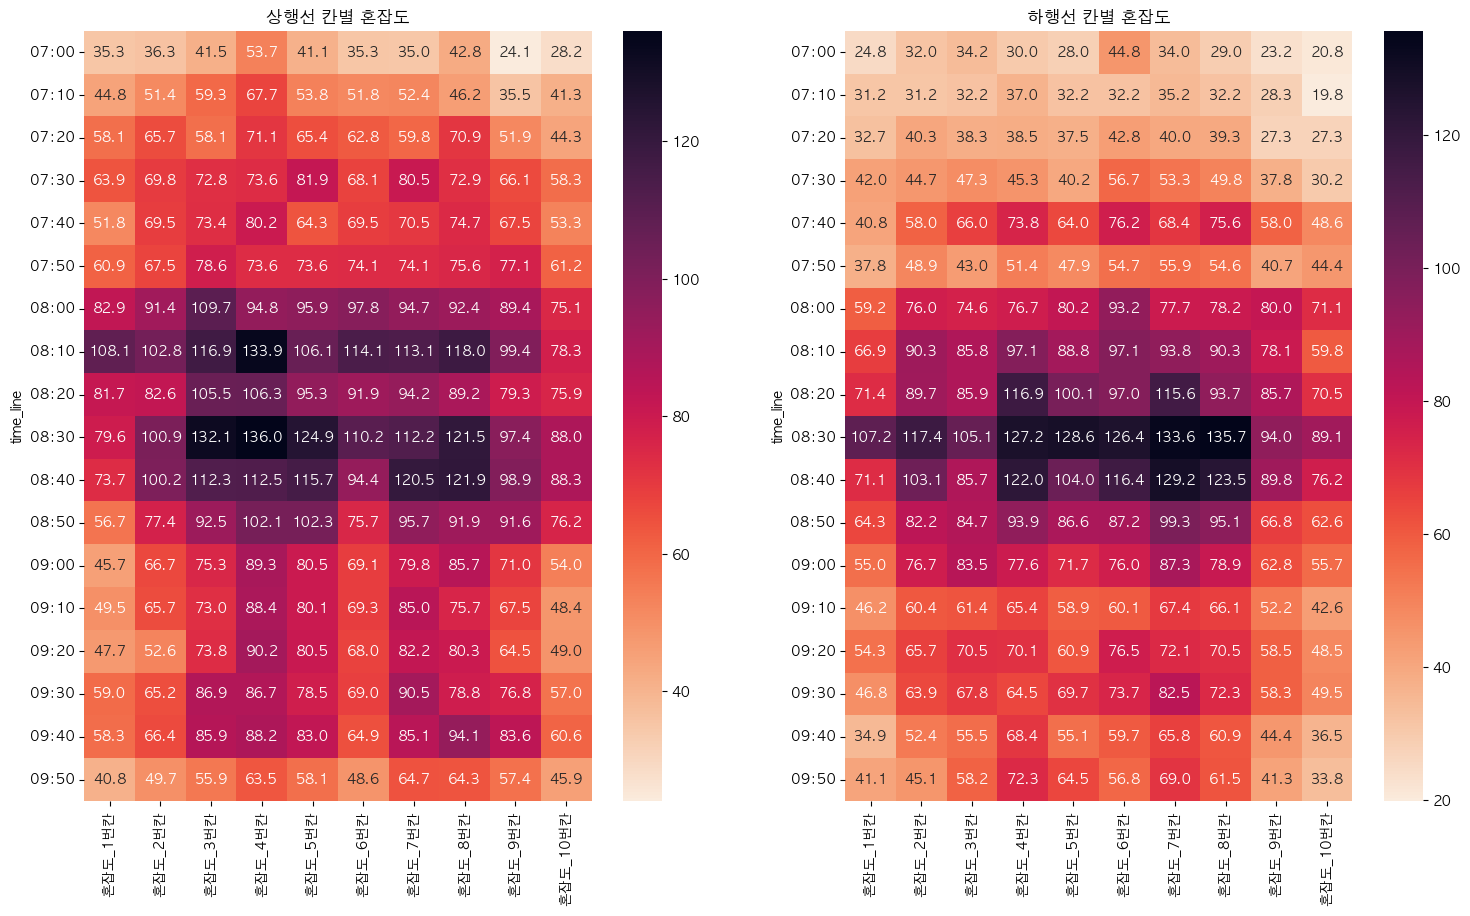

In [19]:
plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
sns.heatmap(df_2_temp_1,annot=True,fmt='.1f',cmap='rocket_r')
plt.title('상행선 칸별 혼잡도')
plt.subplot(1,2,2)
sns.heatmap(df_2_temp_2,annot=True,fmt='.1f',cmap='rocket_r')
plt.title('하행선 칸별 혼잡도')
plt.show()

In [20]:
df_3_temp_1=df_3[(df_3['weekday']=='weekday') & \
                 (df_3['updn']==0) & \
                 (df_3['rapid']==0) & \
                 (df_3['hh'].isin([7,8,9]))].groupby('time_line')[[i for i in df_3.columns if i.startswith('하차수')]].mean()

df_3_temp_2=df_3[(df_3['weekday']=='weekday') & \
                 (df_3['updn']==1) & \
                 (df_3['rapid']==0) & \
                 (df_3['hh'].isin([7,8,9]))].groupby('time_line')[[i for i in df_3.columns if i.startswith('하차수')]].mean()

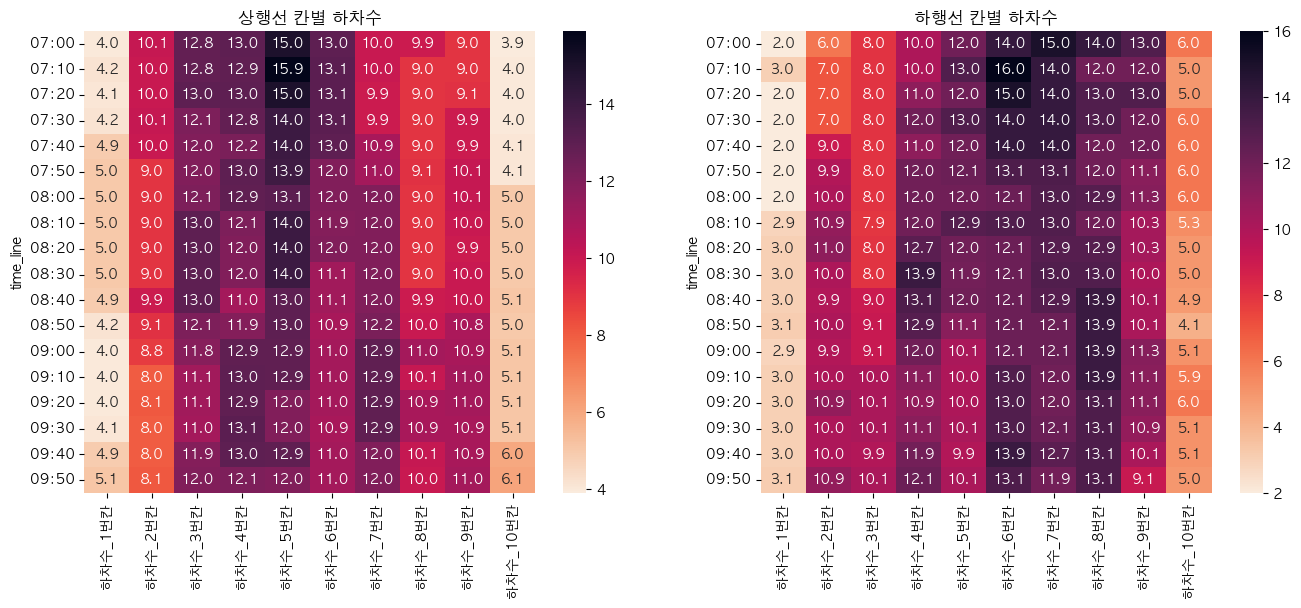

In [21]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.heatmap(df_3_temp_1,annot=True,fmt='.1f',cmap='rocket_r')
plt.title('상행선 칸별 하차수')
plt.subplot(1,2,2)
sns.heatmap(df_3_temp_2,annot=True,fmt='.1f',cmap='rocket_r')
plt.title('하행선 칸별 하차수')
plt.show()

In [27]:
df_3[(df_3['station_name']=='교대역') & (df_3['getOffCarRate']==102)]

,dow,hh,mm,getOffCarRate,updn,rapid,station_line,station_name,station_code,start_day,...,하차수_4번칸,하차수_5번칸,하차수_6번칸,하차수_7번칸,하차수_8번칸,하차수_9번칸,하차수_10번칸,time,time_line,weekday
37,SAT,19,10,102,1,0,2호선,교대역,223,20220927,...,12,9,8,8,7,7,6,1900-01-01 19:10:00,19:10,weekend
91,FRI,6,10,102,0,0,2호선,교대역,223,20220927,...,3,3,4,9,13,13,46,1900-01-01 06:10:00,06:10,weekday
25,TUE,18,10,102,1,0,2호선,교대역,223,20220927,...,11,7,8,9,7,6,5,1900-01-01 18:10:00,18:10,weekday
37,TUE,18,10,102,1,0,2호선,교대역,223,20220927,...,11,8,8,9,7,6,5,1900-01-01 18:10:00,18:10,weekday
39,SAT,9,30,102,1,0,2호선,교대역,223,20220927,...,15,11,9,7,6,6,6,1900-01-01 09:30:00,09:30,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,SUN,18,50,102,0,0,2호선,교대역,223,20220927,...,9,9,11,8,8,11,31,1900-01-01 18:50:00,18:50,weekend
103,SUN,18,10,102,0,0,2호선,교대역,223,20220927,...,10,10,11,9,8,12,27,1900-01-01 18:10:00,18:10,weekend
107,SUN,18,50,102,0,0,2호선,교대역,223,20220927,...,9,9,11,8,8,11,31,1900-01-01 18:50:00,18:50,weekend
37,THU,9,10,102,1,0,2호선,교대역,223,20220927,...,16,10,9,8,9,4,5,1900-01-01 09:10:00,09:10,weekday
